In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
import matplotlib.cm as cm

In [74]:
# Parameters for each cluster
clusters = [
    {"mean": [-6, 8], "cov": [[0.4, 0], [0, 0.4]]},
    {"mean": [-4, 7], "cov": [[1, 2], [2, 5]]},
    {"mean": [8, -6], "cov": [[0.4, 0], [0, 0.4]]},
    {"mean": [4, -10], "cov": [[1, 2], [2, 5]]}
]

# Generate data points for each cluster
data = []
for cluster in clusters:
    points = np.random.multivariate_normal(cluster["mean"], cluster["cov"], 100)
    data.append(points)

# Concatenate all data points
data = np.vstack(data)

In [75]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data)
initial_means = kmeans.cluster_centers_
labels = kmeans.labels_

In [76]:
# Apply GMM
gmm_kmeans = GaussianMixture(n_components=4, covariance_type='full', means_init=initial_means, random_state=0)
gmm_kmeans.fit(data)

GaussianMixture(means_init=array([[  7.59237695,  -6.04177434],
       [ -4.86413409,   5.18179924],
       [  3.69851061, -10.61907582],
       [ -5.12877116,   8.26752743]]),
                n_components=4, random_state=0)

<Figure size 1000x800 with 0 Axes>

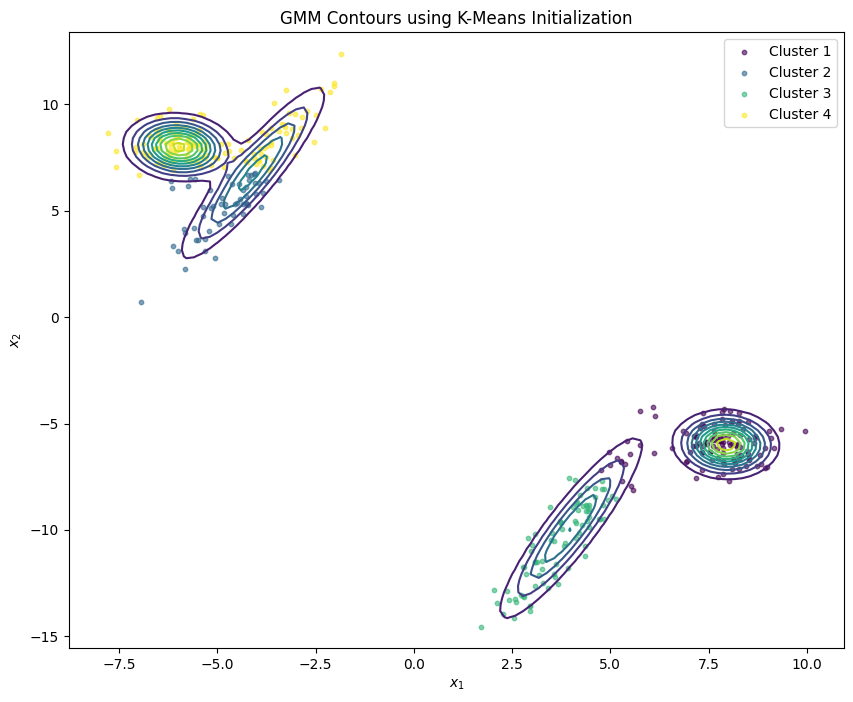

In [77]:
# Plot the contour of the pdf represented by the GMM
x = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 100)
y = np.linspace(data[:, 1].min() - 1, data[:, 1].max() + 1, 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T

# Define a colormap to give each cluster a different color
colors = cm.viridis(np.linspace(0, 1, 4))

# Calculate the pdf for each Gaussian component and sum them up
Z = np.zeros(XX.shape[0])
for i in range(4):
    mean = gmm_kmeans.means_[i]
    cov = gmm_kmeans.covariances_[i]
    pdf = multivariate_normal(mean=mean, cov=cov).pdf(XX)
    Z += pdf * gmm_kmeans.weights_[i]

# Reshape Z to match the grid shape
Z = Z.reshape(X.shape)

# Plot the data and the GMM contours
plt.figure(figsize=(10, 8))
# Plot the data points with colors based on K-Means clusters
plt.figure(figsize=(10, 8))
for i, color in enumerate(colors):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], s=10, color=color, alpha=0.6, label=f'Cluster {i+1}')
plt.contour(X, Y, Z, levels=10, cmap="viridis")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("GMM Contours using K-Means Initialization")
plt.legend()
plt.show()